## 02-Regression Homework NB

In this homework, we will use Laptop prices dataset from Kaggle.

In [1]:
### Download the data    	
#!curl -O "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

### Load & prepare the dataframe

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('laptops.csv', encoding='latin-1')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
# First, we'll normalize the names of the columns:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Now, instead of 'Final Price', we have 'final_price'.

Next, use only the following columns:

    'ram',
    'storage',
    'screen',
    'final_price'


In [4]:
df2 = df[["ram", "storage", "screen", "final_price"]]
print(df2.shape)
df2.head()

(2160, 4)


,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA
Look at the final_price variable. Does it have a long tail?


<Axes: >

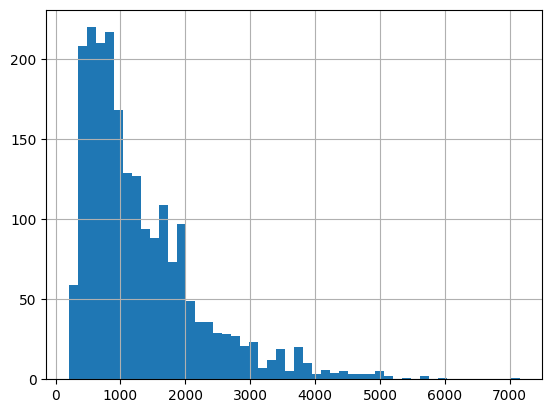

In [5]:
df2["final_price"].hist(bins=50)

<Axes: >

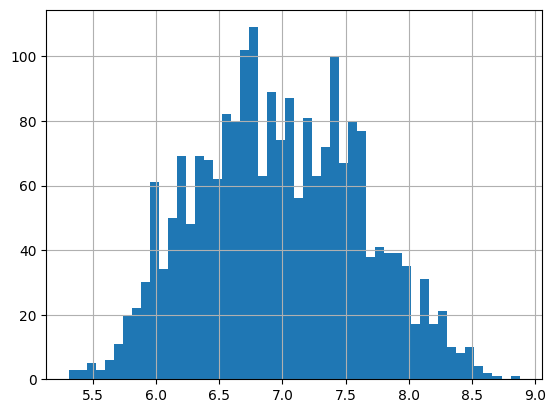

In [6]:
np.log1p(df2["final_price"]).hist(bins=50)

In [ ]:
#df2["final_price"] = np.log1p(df2["final_price"])

### Question 1

There's one column with missing values. What is it?

    'ram'
    'storage'
    'screen'
    'final_price'


In [7]:
df2.count()

ram            2160
storage        2160
screen         2156
final_price    2160
dtype: int64

-> "screen" has 4 missing values

### Question 2

What's the median (50% percentile) for variable 'ram'?

    8
    16
    24
    32


In [8]:
df2.ram.median()

16.0

-> median value of "ram" is 16 

### Prepare and split the dataset


- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [9]:
# create train, test and validation sets
n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(432, 432, 1296)

In [10]:
# shuffle the data
idx = np.arange(n) 
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [12]:

df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]


### Question 3

We need to deal with missing values for the column from Q1. <br>
We have two options: fill it with 0 or with the mean of this variable. <br>
Try both options. <br>
For each, train a linear regression model without regularization using the code from the lessons. <br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
<br>
Options:
<br>
- With 0 
- With mean
- Both are equally good


### Impute missing values

In [13]:
# 1. fill missing values with 0
df_train_zeroes = df_train.fillna(0)
# 2. with mean
df_train_mean = df_train.fillna(df_train.mean())
#....not so elegant code but works as there is only one column with missing values

<Axes: >

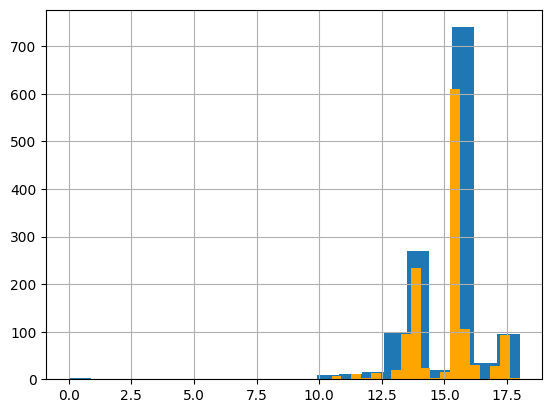

In [14]:
df_train_zeroes["screen"].hist(bins=20)
df_train_mean["screen"].hist(bins=20, color="orange")

In [15]:
df_train_mean["screen"].describe()

count    1296.000000
mean       15.163534
std         1.231947
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.000000
Name: screen, dtype: float64

### Linear Regression

In [16]:
# function from lession 02-regression/notebook.ipynb
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [17]:
cols = ["ram", "storage", "screen"]
target = "final_price"

In [18]:
"""y_train = np.log1p(df_train[target]).values
X_train_zeroes = np.log1p(df_train_zeroes[cols]).values
X_train_mean = np.log1p(df_train_mean[cols]).values
"""

y_train = df_train[target].values 
X_train_zeroes = df_train_zeroes[cols].values
X_train_mean = df_train_mean[cols].values

In [19]:
w0_zeroes, w_zeroes = train_linear_regression(X_train_zeroes, y_train)

y_pred_zeroes = w0_zeroes + X_train_zeroes.dot(w_zeroes)

In [20]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

In [21]:
print(f'RMSE with zeroes: {rmse(y_train, y_pred_zeroes):.2f}')
print(f'RMSE with mean: {rmse(y_train, y_pred_mean):.2f}')

RMSE with zeroes: 602.39
RMSE with mean: 602.18


-> RMSE non-logged almost identical, but mean imputed slightly better <br>
-> RMSE logged equal

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [22]:
# function from lession 02-regression/notebook.ipynb
# adapted r
def train_linear_regression_reg(X, y, r):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
for r0 in r_values:
    w0, w = train_linear_regression_reg(X_train_zeroes, y_train, r=r0)
    y_pred = w0 + X_train_zeroes.dot(w)
    print(f'r={r0} RMSE: {rmse(y_train, y_pred):.2f}')


r=0 RMSE: 602.39
r=0.01 RMSE: 602.39
r=0.1 RMSE: 602.39
r=1 RMSE: 602.41
r=5 RMSE: 602.71
r=10 RMSE: 603.13
r=100 RMSE: 604.99


-> RMSE best for r = [0, 0.01, 0.1]

### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [24]:

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#seed_values = [0, 1, 12, 33, 45, 905, 886, 37, 18, 90]

rmse_values = []

for s in seed_values:
    # shuffle the data
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df2.iloc[idx[:n_train]]
    df_val = df2.iloc[idx[n_train:n_train+n_val]]
    df_test = df2.iloc[idx[n_train+n_val:]]

    df_train_zeroes = df_train.fillna(0)
    y_train = df_train_zeroes[target].values
    X_train_zeroes = df_train_zeroes[cols].values
    
    w0, w = train_linear_regression_reg(X_train_zeroes, y_train, r=0)
    y_pred = w0 + X_train_zeroes.dot(w)
    print(f'seed={s} RMSE: {rmse(y_train, y_pred):.2f}')
    rmse_values.append(rmse(y_train, y_pred))

print(f'RMSE standard deviation: {np.std(rmse_values):.3f}')




seed=0 RMSE: 602.88
seed=1 RMSE: 581.03
seed=2 RMSE: 591.11
seed=3 RMSE: 576.90
seed=4 RMSE: 590.65
seed=5 RMSE: 603.65
seed=6 RMSE: 588.46
seed=7 RMSE: 590.66
seed=8 RMSE: 563.29
seed=9 RMSE: 591.38
RMSE standard deviation: 11.330


### Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60


In [58]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]

df_train = pd.concat([df_train, df_val], axis=0)

df_test = df2.iloc[idx[n_train+n_val:]]

df_train_zeroes = df_train.fillna(0)
y_train = df_train_zeroes[target].values
X_train_zeroes = df_train_zeroes[cols].values

y_test = df_test[target].values
X_test_zeroes = df_test[cols].fillna(0).values


w0, w = train_linear_regression_reg(X_train_zeroes, y_train, r=0.001)
y_pred = w0 + X_test_zeroes.dot(w)

print(f'seed=9 RMSE: {rmse(y_test, y_pred):.2f}')

seed=9 RMSE: 608.61
